<a href="https://colab.research.google.com/github/kanika26187/Fraud-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **IMPORTING  THE DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she




*  **Data Pre-processing**






In [ ]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [ ]:
true_df["label"] = 1
fake_df["label"] = 0

In [ ]:
df = pd.concat([true_df, fake_df],axis=0)
df.sample(frac=1).reset_index(drop =True)


,title,text,subject,date,label
0,BRILLIANT! LIBERAL SENATOR TRIES TO EMBARRASS ...,"Father Robert A. Sirico, President and Co-Foun...",left-news,"Apr 19, 2016",0
1,Trump Is FUMING Over Bad Charlottesville Pres...,"Once again, Donald Trump is having a completel...",News,"August 15, 2017",0
2,Republican's plan to revamp Dodd-Frank highlig...,NEW YORK (Reuters) - The chair of the House Fi...,politicsNews,"June 7, 2016",1
3,WOW! US Marine And Navy Veteran Writes BLISTER...,Wow! This is a spectacular letter that should ...,politics,"Aug 1, 2016",0
4,Elections official asks Trump for evidence of ...,WASHINGTON (Reuters) - A member of the Federal...,politicsNews,"February 11, 2017",1
...,...,...,...,...,...
44893,ACLU threatens Cleveland over delays in conven...,(Reuters) - The American Civil Liberties Union...,politicsNews,"May 19, 2016",1
44894,Trump's Treasury nominee Mnuchin pledges to di...,WASHINGTON (Reuters) - U.S. President-elect Do...,politicsNews,"January 11, 2017",1
44895,TRUMP HITS BACK After Cowgirl Congresswoman Tr...,The left is going ballistic over supposed word...,politics,"Oct 18, 2017",0
44896,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,"Sep 2, 2016",0


In [ ]:
print(df.shape)

(44898, 5)


In [ ]:
print(df.head())

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  


In [ ]:
print(df.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
print(df.fillna(''))

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

In [ ]:
X = df.drop(columns='label',axis=1)
y = df["label"]


In [ ]:
print(X)
print(y)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv... 

 **Stemming:**   



 Stemming the process of reducing a word to its Root word
example: actor,actress,acting->act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
df['text'].head(10).apply(stemming)


,text
0,washington reuter head conserv republican fact...
1,washington reuter transgend peopl allow first ...
2,washington reuter special counsel investig lin...
3,washington reuter trump campaign advis georg p...
4,seattl washington reuter presid donald trump c...
5,west palm beach fla washington reuter white ho...
6,west palm beach fla reuter presid donald trump...
7,follow statement post verifi twitter account u...
8,follow statement post verifi twitter account u...
9,washington reuter alabama secretari state john...


In [ ]:
print(df['text'])

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44898, dtype: object


In [ ]:
X = df['text'].values
y = df['label'].values
print(X)


['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educa

In [ ]:
print(y)

[1 1 1 ... 0 0 0]


In [ ]:
y.shape

(44898,)

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9397629 stored elements and shape (44898, 122002)>
  Coords	Values
  (0, 560)	0.04415459472102848
  (0, 717)	0.02533933586987911
  (0, 1766)	0.023060255420431486
  (0, 4152)	0.08982096498982725
  (0, 5220)	0.02454604625445347
  (0, 5762)	0.03730822651917784
  (0, 7377)	0.04420924913542458
  (0, 8707)	0.033839849283034525
  (0, 9173)	0.023635336948816792
  (0, 9303)	0.032669290042775925
  (0, 9472)	0.03769493886221369
  (0, 9922)	0.011861908292740232
  (0, 10110)	0.04145963727805276
  (0, 10261)	0.09042245098980951
  (0, 10272)	0.03221747395859451
  (0, 11276)	0.021128140690793905
  (0, 11293)	0.038197147492535506
  (0, 11780)	0.04343343449766702
  (0, 11895)	0.009764149396509
  (0, 12004)	0.11648547670550334
  (0, 12955)	0.030869518163213965
  (0, 12974)	0.03529634355393324
  (0, 13250)	0.02057347192762199
  (0, 13562)	0.040500947513185614
  (0, 13695)	0.06352439440355176
  :	:
  (44897, 116826)	0.02023827668186657
  (44897,

*   **Splitting** **the** **dataset** **to** **training** **and** **test** **data**




In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)





 *  **Training the Model** : **Logistic Regression**





In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9914527534940698


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy score of the test data : ', training_data_accuracy)

Accuracy score of the test data :  0.9914527534940698




*   **Model Evaluation**




              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Text(0.5, 1.0, 'Confusion Matrix')

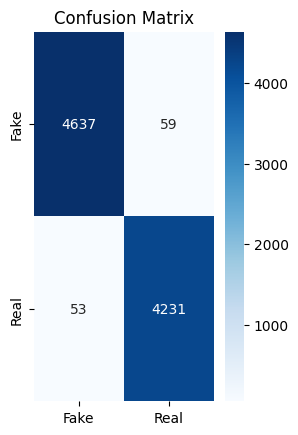

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, X_test_prediction))

# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')



*   **Make a Predictive system**




In [ ]:
def predict_news(news):
  news = stemming(news)
  news_tfidf = vectorizer.transform([news])
  prediction = model.predict(news_tfidf)
  if prediction[0] == 0:
      return "The news is fake"
  elif prediction[0] == 1:
      return"The news is true"

print(predict_news("The government passed a new economic policy yesterday."))
print(predict_news("Aliens landed in New York last night!"))
print(predict_news("""WASHINGTON - President Biden announced Wednesday that the United States will provide an additional
113 billion since the conflict began in February 2022."""))

print(predict_news("Chinese fans prepare to welcome rich"))

The news is fake
The news is fake
The news is true
The news is fake




*   **Deploy a model and Save the model**



In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Fit the vectorizer on the original text data
tfidf = TfidfVectorizer()
tfidf.fit(df['text'])

TfidfVectorizer()

In [ ]:
# Save the fitted vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)


In [ ]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files

files.download("vectorizer.pkl")
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>